In [1]:
###Hierarchical Clustering

In [1]:
# import hierarchical clustering libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch #to draw dendrogram
from sklearn.cluster import AgglomerativeClustering #for model building

In [3]:
# import dataset
airline = pd.read_csv("EastWestAirlines.csv")
airline

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
airline = airline.drop(['ID'],axis=1)
airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [6]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [7]:
#Normalized data frame (considering the numerical part of data)
airline_norm = norm_func(airline)
airline_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


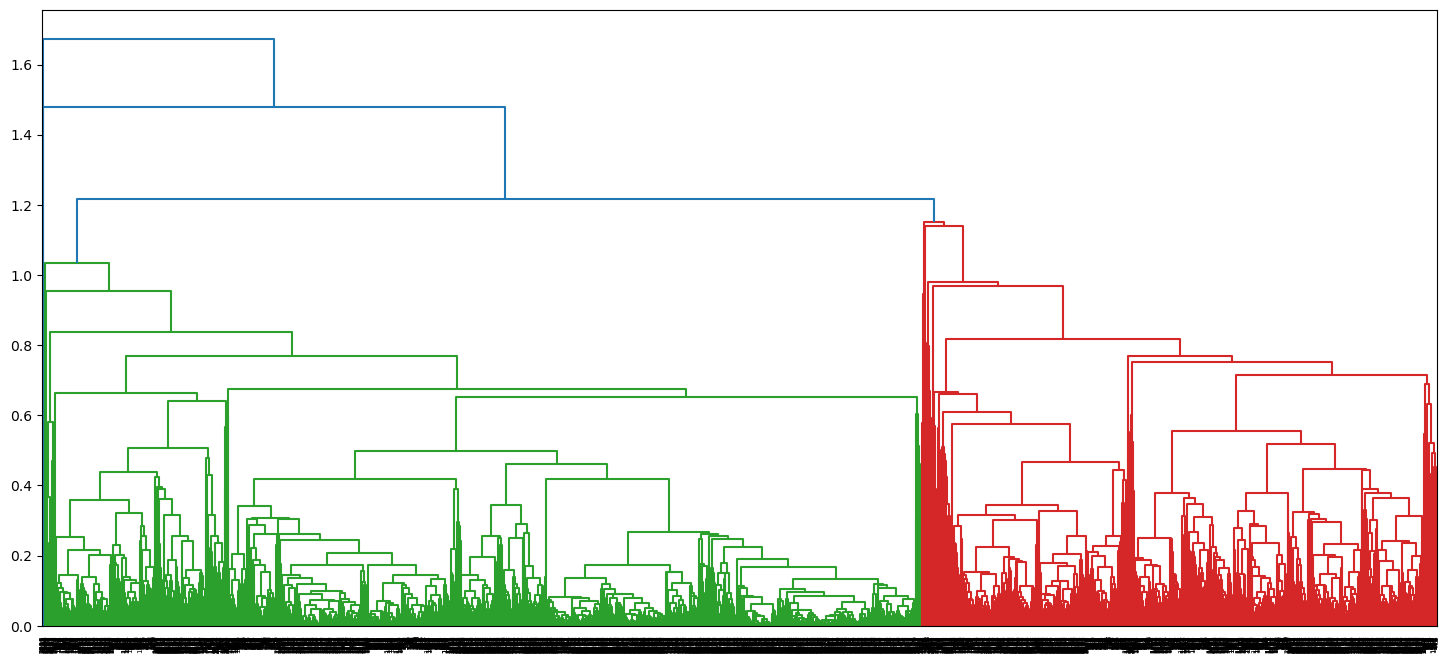

In [8]:
# create dendrograms
plt.figure(figsize=(18,8))
dendrogram = sch.dendrogram(sch.linkage(airline_norm, method='average'))

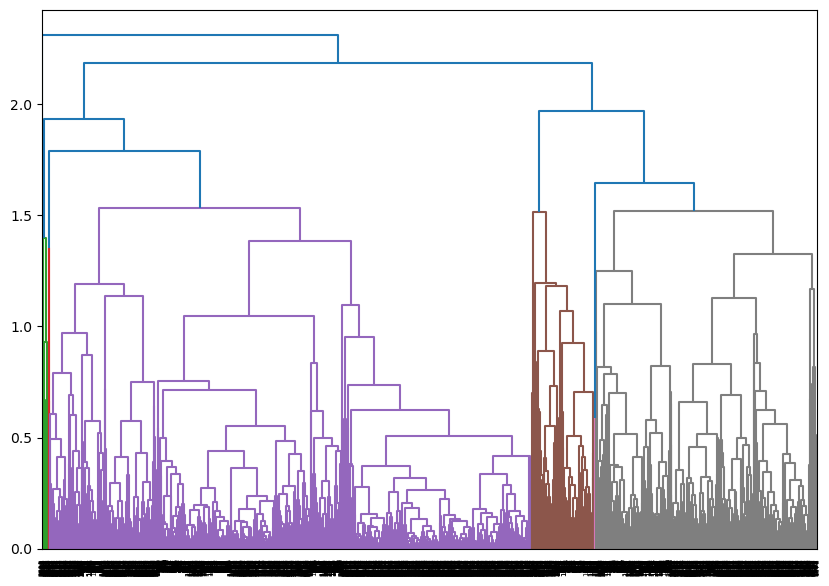

In [9]:
# Create Dendrograms
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(airline_norm,'complete'))


In [10]:
# create clusters
hc = AgglomerativeClustering(n_clusters = 5,
                            affinity = 'euclidean',
                            linkage = 'average')

In [11]:
hc

AgglomerativeClustering(linkage='average', n_clusters=5)

In [12]:
#save clusters for chart 
y_hc = hc.fit_predict(airline_norm)
y_hc

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [13]:
Clusters = pd.DataFrame(y_hc, columns=['Clusters'])
Clusters

,Clusters
0,1
1,1
2,1
3,1
4,0
...,...
3994,0
3995,0
3996,0
3997,1


In [16]:
airline_norm['h_clusterid'] = Clusters

In [17]:
airline_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,1
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,1
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,1
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,1
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,1


In [18]:
airline_norm.sort_values("h_clusterid")

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
1999,0.191881,0.130248,1.00,0.0,0.00,0.371644,0.290698,0.011357,0.056604,0.535086,1.0,0
1505,0.229478,0.000000,0.50,0.0,0.00,0.104181,0.232558,0.051919,0.132075,0.591150,1.0,0
1503,0.297607,0.000000,0.75,0.0,0.00,0.196314,0.209302,0.014602,0.018868,0.574873,1.0,0
3165,0.114272,0.000000,0.00,0.0,0.00,0.078965,0.290698,0.215693,0.226415,0.292018,1.0,0
1501,0.031743,0.165590,0.50,0.0,0.00,0.132723,0.162791,0.000000,0.000000,0.584278,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.056678,0.106028,0.00,0.0,0.50,0.186052,0.302326,0.074634,0.169811,0.812153,1.0,4
1946,0.074419,0.000000,0.75,0.0,1.00,0.362546,0.372093,0.016225,0.018868,0.467567,1.0,4
2364,0.063397,0.000000,1.00,0.0,1.00,0.822974,0.279070,0.000000,0.000000,0.429829,1.0,4
1878,0.075258,0.000000,1.00,0.0,0.75,0.501595,0.372093,0.012980,0.037736,0.494454,1.0,4


In [19]:
airline['h_clusterid'] = Clusters

In [20]:
airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [21]:
airline.sort_values("h_clusterid")

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
1999,327126,1452,5,1,1,97997,25,350,3,4440,1,0
1505,391222,0,3,1,1,27471,20,1600,7,4905,1,0
1503,507371,0,4,1,1,51765,18,450,1,4770,1,0
3165,194816,0,1,1,1,20822,25,6647,12,2424,1,0
1501,54116,1846,3,1,1,34997,14,0,0,4848,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
106,96627,1182,1,1,3,49059,26,2300,9,6738,1,4
1946,126873,0,4,1,5,95598,32,500,1,3880,1,4
2364,108081,0,5,1,5,217006,24,0,0,3567,1,4
1878,128302,0,5,1,4,132263,32,400,2,4103,1,4


In [22]:
y = pd.DataFrame(hc.fit_predict(airline_norm),columns=['clustersid'])
y['clustersid'].value_counts()

1    2518
0    1468
2       8
4       4
3       1
Name: clustersid, dtype: int64

In [24]:
# adding clusters to dataset
airline['clusterid']=hc.labels_

In [25]:
airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid,clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,1,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,1,1


In [26]:
airline.groupby('clusterid').agg(['mean']).reset_index()

,clusterid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,9.597426e+04,240.572888,2.656676,1.015668,1.000681,28342.702997,15.547003,804.152589,2.461853,4627.118529,1.0,0.0
1,1,5.980784e+04,87.602462,1.705322,1.013900,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0,1.0
2,2,7.656512e+04,147.750000,3.875000,1.000000,4.250000,115273.250000,30.250000,600.000000,2.000000,5127.875000,1.0,4.0
3,3,1.704838e+06,0.000000,1.000000,1.000000,1.000000,17108.000000,32.000000,4823.000000,23.000000,7283.000000,1.0,2.0
4,4,1.319995e+05,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.0,3.0


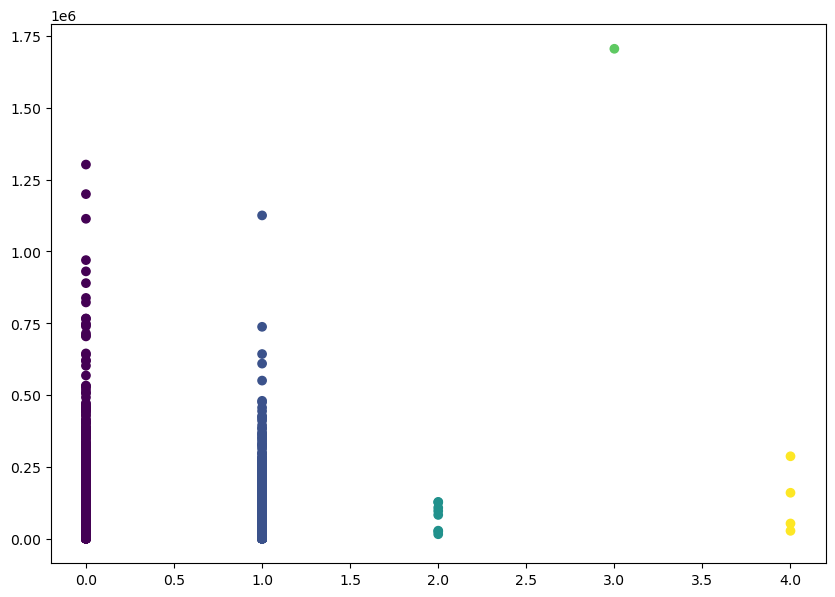

In [27]:
# plot Clusters
plt.figure(figsize=(10,7))
plt.scatter(airline['clusterid'],airline['Balance'], c=hc.labels_)

In [28]:
###K-Means

In [29]:
from sklearn.cluster import KMeans

In [30]:
airline1 = pd.read_csv("EastWestAirlines.csv")
airline1

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [33]:
airline1.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [34]:
airline1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [36]:
# different cc_miles have different max values.
# so, we want to check what values these columns can take
print('unique_cc1', airline1.cc1_miles.unique())
print('unique_cc2', airline1.cc2_miles.unique())
print('unique_cc3', airline1.cc3_miles.unique())
    

unique_cc1 [1 4 3 2 5]
unique_cc2 [1 2 3]
unique_cc3 [1 3 2 4 5]


In [37]:
airline1[airline1.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
3876,1000,0,1,1,1,0,0,0,0,1597,0


In [39]:
# Normalization function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_airline1_df = scaler.fit_transform(airline1.iloc[:,1:])
scaled_airline1_df

array([[-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
         1.39545434, -0.7669193 ],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
         1.37995704, -0.7669193 ],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
         1.41192021, -0.7669193 ],
       ...,
       [-0.18629869,  0.68312117, -0.09824189, ..., -0.36216787,
        -1.31560393,  1.30391816],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.09850333,
        -1.31608822, -0.7669193 ],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
        -1.31754109, -0.7669193 ]])

In [41]:
kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(scaled_airline1_df)

KMeans(n_clusters=4, random_state=0)

In [42]:
kmeans.inertia_

23772.870563808854

In [44]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

wcss = []
sil_score = []
cal_haz_score = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(scaled_airline1_df)
    wcss.append(kmeans.inertia_)
    if i==1:
        continue #min 2 labels needed for silhoutte and cal_haz score (Refer documentation)
    sil_score.append(silhouette_score(scaled_airline1_df, kmeans.labels_))
    cal_haz_score.append(calinski_harabasz_score(scaled_airline1_df, kmeans.labels_))


In [45]:
wcss

[39990.00000000001,
 31994.059340796615,
 27514.811787685063,
 23772.870563808854,
 20301.45945658562,
 18344.471180477365,
 15550.247825458413,
 13959.671669697083,
 12704.208041215812,
 11704.073227712532]

In [46]:
sil_score

[0.3319356416389901,
 0.3240784893106218,
 0.3217022779082238,
 0.3380749954924667,
 0.23547021743671917,
 0.3073717646657763,
 0.2676299140690995,
 0.28853313687411486,
 0.29528164129028994]

In [47]:
cal_haz_score

[998.9294503123176,
 905.891731248243,
 908.4225079688704,
 968.3544069646705,
 942.3069229536779,
 1045.6799121559334,
 1063.1346409236778,
 1071.203234022391,
 1071.1613878101623]

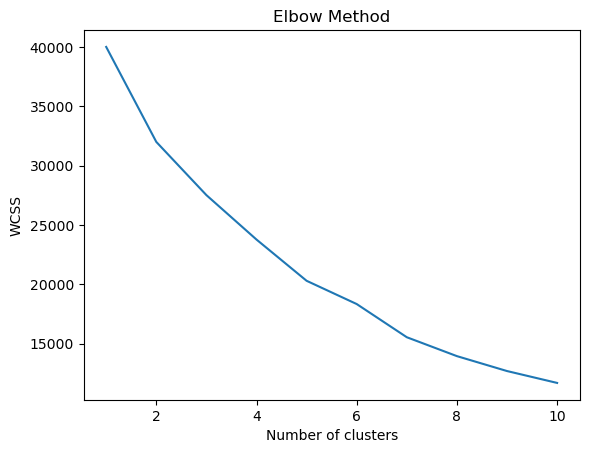

In [48]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [49]:
#Build cluster algorithm
clusters_new = KMeans(5, random_state = 42)
clusters_new.fit(scaled_airline1_df)

KMeans(n_clusters=5, random_state=42)

In [50]:
clusters_new.labels_

array([2, 2, 2, ..., 1, 2, 2])

In [51]:
#Assign clusters to the data set
airline1['clusterid_new'] = clusters_new.labels_

In [52]:
airline1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,2


In [53]:
#these are standardized values.
clusters_new.cluster_centers_

array([[ 7.73140018e-01,  8.15431230e-02, -9.82418871e-02,
        -6.27665798e-02,  5.77251875e-01,  1.57414409e+00,
         3.55950978e+00,  3.78690908e+00,  2.56640750e-01,
         8.84668858e-01],
       [ 1.03718822e-02,  1.23274351e+00, -9.82418871e-02,
        -5.44575426e-02,  9.43884607e-01,  7.62740150e-01,
        -9.91412291e-02, -1.07270765e-01,  3.69238822e-01,
         5.95164382e-01],
       [-5.14050016e-02, -5.97195195e-01, -9.82418871e-02,
        -6.07538013e-02, -5.11287048e-01, -4.90896226e-01,
        -1.81620029e-01, -1.94645057e-01, -1.95515147e-01,
        -3.47869675e-01],
       [-8.44329231e-02,  1.02208440e+00, -9.82418871e-02,
         1.56462993e+01,  3.17969131e+00,  1.71461374e+00,
         3.32926913e-02,  5.96953922e-02,  2.39872612e-01,
         3.37527346e-01],
       [-1.56235600e-01, -6.68227273e-01,  9.03825361e+00,
        -6.27665798e-02, -1.01665326e-01,  6.17851143e-01,
         8.75493989e-02,  2.20346809e-01, -7.24639805e-02,
         5.

In [54]:
airline1.groupby('clusterid_new').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
clusterid_new,,,,,,,,,,,
0,165308.601227,742.190184,2.171779,1.000000,1.000000,31084.294479,26.717791,5443.490798,15.736196,4648.490798,0.797546
1,113162.407948,152.137875,3.756691,1.000000,1.001622,39937.722628,18.926196,321.254663,0.966748,4880.991890,0.657745
2,48261.117485,104.349312,1.237328,1.000000,1.000393,4798.313163,6.888016,205.781532,0.635363,3714.844794,0.202358
3,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
4,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349


In [55]:
airline1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,2


In [56]:
airline1[airline1['clusterid_new']==3]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_new
106,96627,1182,1,1,3,49059,26,2300,9,6738,1,3
384,28193,0,5,1,4,103456,32,0,0,6980,1,3
850,25629,0,4,1,5,107308,36,600,2,5966,1,3
904,15835,0,2,1,5,112171,16,0,0,5825,1,3
1036,154664,0,4,1,3,73881,33,0,0,5769,0,3
1244,166465,0,4,1,4,98717,30,0,0,5531,0,3
1300,737514,0,3,1,4,43993,40,2150,7,5030,0,3
1878,128302,0,5,1,4,132263,32,400,2,4103,1,3
1917,82981,0,5,1,3,105325,44,1000,2,3964,1,3
1946,126873,0,4,1,5,95598,32,500,1,3880,1,3


In [57]:
airline1[airline1['clusterid_new']==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_new
21,185681,2024,1,1,1,13300,16,1800,9,6896,1,0
22,20584,0,1,1,1,3450,11,3450,11,6884,0,0
42,60313,0,1,1,1,10000,26,3250,9,7829,1,0
50,108137,0,1,1,1,6368,5,6368,5,6844,0,0
65,53914,0,3,1,1,33767,45,5550,29,6826,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3907,126490,0,1,1,1,8808,15,5183,12,1566,0,0
3911,55922,2273,1,1,1,8104,19,4104,16,1552,0,0
3917,130748,0,4,1,1,65510,37,6349,7,1545,0,0
3934,76595,0,1,1,1,10577,2,9577,1,1515,0,0


In [58]:
airline1.sort_values('clusterid_new')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_new
2058,42342,0,1,1,1,11408,23,11408,23,4331,0,0
375,231,0,1,1,1,29900,24,5300,15,7015,1,0
662,109532,0,5,1,1,128048,53,7939,26,6372,1,0
622,62080,2975,2,1,1,19113,32,10650,28,6434,1,0
2802,87633,0,4,1,1,69237,37,4050,9,2068,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3788,374613,0,1,2,1,23592,31,5000,14,3463,1,4
226,117329,0,1,2,1,6448,11,0,0,7416,1,4
3359,20318,0,1,2,1,6990,13,0,0,1956,0,4
940,44824,0,1,3,1,21107,19,2000,4,5916,1,4


In [59]:
airline1['clusterid_new'].value_counts()

2    2545
1    1233
0     163
4      43
3      15
Name: clusterid_new, dtype: int64

In [2]:
####DBSCAN

In [44]:
#import the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


In [45]:
# Import .csv file and convert it to a dataframe object
airline2 = pd.read_csv("EastWestAirlines.csv")
airline2

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [46]:
airline2.shape

(3999, 12)

In [47]:
airline2.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [48]:
print(airline2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB
None


In [49]:
airline2.drop(['ID'], axis=1, inplace=True)

In [50]:
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [51]:
airline2.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


<AxesSubplot:>

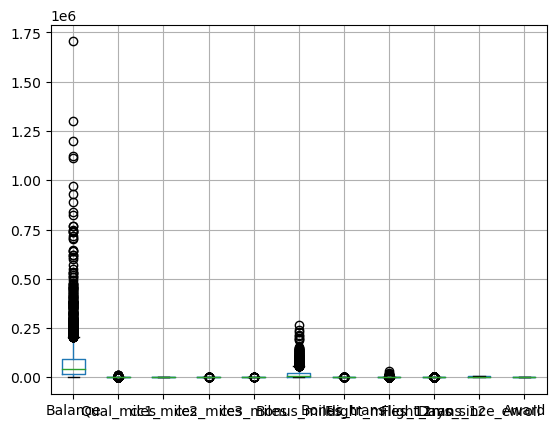

In [14]:
airline2.boxplot()

In [53]:
airline2.apply(np.log10).boxplot()

C:\Users\rajeshwari pilankar\anaconda3\Raj\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\rajeshwari pilankar\anaconda3\Raj\lib\site-packages\matplotlib\cbook\__init__.py:1220: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\rajeshwari pilankar\anaconda3\Raj\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\rajeshwari pilankar\anaconda3\Raj\lib\site-packages\matplotlib\cbook\__init__.py:1235: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\rajeshwari pilankar\anaconda3\Raj\lib\site-packages\matplotlib\cbook\__init__.py:1236: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


<AxesSubplot:>

In [16]:
array = airline2.values

In [17]:
array

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]], dtype=int64)

In [18]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [19]:
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [26]:
#min_samples = 4
dbscan = DBSCAN(eps = 0.4, min_samples = 3)
dbscan.fit(X)

DBSCAN(eps=0.4, min_samples=3)

In [23]:
#Noisy samples are given the table -1
dbscan.labels_

array([ 0,  0,  0, ..., 48,  0,  0], dtype=int64)

In [24]:
cl = pd.DataFrame(dbscan.labels_, columns=['cluster'])

In [25]:
cl

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,48
3997,0


In [27]:
clustered = pd.concat([airline2, cl], axis = 1)

In [28]:
clustered

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,48
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [29]:
clustered[clustered['cluster']== -1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster
4,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
6,84914,0,3,1,1,27482,25,0,0,6994,0,-1
8,443003,0,3,2,1,1753,43,3850,12,6948,1,-1
9,104860,0,3,1,1,28426,28,1150,3,6931,1,-1
19,23354,0,3,1,1,10447,5,0,0,6896,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3978,10071,0,2,1,1,27701,16,0,0,1421,1,-1
3979,57793,0,3,1,1,20959,15,1198,3,1424,1,-1
3980,28867,0,3,1,1,19169,28,0,0,1425,0,-1
3985,59017,0,4,1,1,34746,25,0,0,1418,0,-1


In [30]:
clustered.mean()

Balance              73601.327582
Qual_miles             144.114529
cc1_miles                2.059515
cc2_miles                1.014504
cc3_miles                1.012253
Bonus_miles          17144.846212
Bonus_trans             11.601900
Flight_miles_12mo      460.055764
Flight_trans_12          1.373593
Days_since_enroll     4118.559390
Award                    0.370343
cluster                  2.896974
dtype: float64

In [31]:
clustered.sort_values('cluster')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster
1999,327126,1452,5,1,1,97997,25,350,3,4440,1,-1
3108,17219,0,1,1,1,6167,10,3757,6,2627,1,-1
1420,68891,1697,4,1,1,37257,14,500,1,5178,1,-1
1419,168897,0,4,1,1,37451,24,400,2,5189,0,-1
1418,32313,0,4,1,1,29188,27,0,0,5397,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3877,63162,0,3,1,1,27564,8,0,0,1600,1,48
3996,73597,0,3,1,1,25447,8,0,0,1402,1,48
3801,89876,0,4,1,1,51620,17,0,0,1739,0,49
3823,86500,0,4,1,1,51740,20,0,0,1691,0,49


In [32]:
X.shape

(3999, 11)

In [33]:
min_samples

4

In [34]:
##DBSCAN on Sample dataset

In [35]:
from sklearn.datasets import make_moons, make_blobs

X, y = make_moons(1000)
X = X + np.random.rand(1000, 2)*0.4

In [36]:
data = pd.DataFrame(X)
data.columns = ['feature 1', 'feature 2']
data['class'] = y
data

,feature 1,feature 2,class
0,-0.442107,1.221541,0
1,1.239036,-0.181587,1
2,0.227185,0.199268,1
3,1.868946,-0.112033,1
4,0.292928,1.166840,0
...,...,...,...
995,2.248473,0.677299,1
996,2.039509,0.300009,1
997,0.391894,0.344646,1
998,0.479676,0.181136,1


In [39]:
from sklearn.metrics import silhouette_score
silhouette_score(data.iloc[:,:3], model_dbscan.labels_)

0.40011599262021946

In [40]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(data.iloc[:,:3], model_dbscan.labels_)

504.8190173583174